**Zadanie 1:**
Korzystając z plików *winequality-red.csv* i *winequality-white.csv* stwórz modele regresji logistycznej:
1. Bazując na kolumnach `fixed acidity`, `citric acid`, `density` oraz `pH` stwórz model regresji logistycznej, który będzie przewidywał czy wino będzie przydzielone do kategorii nisko alkoholowe lub wysoko alkoholowe przy założeniu że kolumna `alkohol >= 10` – wysoko alkoholowe, `alkohol < 10` – nisko alkoholowe.
2. Przygotuj model dla obydwu zbiorów i sprawdź dla którego zbioru danych model ma większą dokładność.
3. Wykorzystaj metodę RFE z biblioteki `scikit-learn` znad najlepsze 3 predykatory i sprawdź czy predykatory z punktu 1 znajdą się w wynikach. [Dokumentacji RFE](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import RFE

red_wine = pd.read_csv('winequality-red.csv', sep=';')
white_wine = pd.read_csv('winequality-white.csv', sep=';')

red_wine['alcohol_category'] = (red_wine['alcohol'] >= 10).astype(int)
white_wine['alcohol_category'] = (white_wine['alcohol'] >= 10).astype(int)

features = ['fixed acidity', 'citric acid', 'density', 'pH']
target = 'alcohol_category'

X_red = red_wine[features]
y_red = red_wine[target]

X_white = white_wine[features]
y_white = white_wine[target]

X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_red, y_red, test_size=0.3, random_state=42)
X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(X_white, y_white, test_size=0.3, random_state=42)

model_red = LogisticRegression()
model_white = LogisticRegression()

model_red.fit(X_train_red, y_train_red)
model_white.fit(X_train_white, y_train_white)

y_pred_red = model_red.predict(X_test_red)
y_pred_white = model_white.predict(X_test_white)

accuracy_red = accuracy_score(y_test_red, y_pred_red)
accuracy_white = accuracy_score(y_test_white, y_pred_white)

print("Dokładność modelu dla czerwonego wina:", accuracy_red)
print("Dokładność modelu dla białego wina:", accuracy_white)

from sklearn.feature_selection import RFE

estimator = LogisticRegression()

selector_red = RFE(estimator, n_features_to_select=3)
selector_red = selector_red.fit(X_train_red, y_train_red)

print("Czerwone wino - wybrane cechy:", X_red.columns[selector_red.support_])

selector_white = RFE(estimator, n_features_to_select=3)
selector_white = selector_white.fit(X_train_white, y_train_white)

print("Białe wino - wybrane cechy:", X_white.columns[selector_white.support_])

selected_features_red = X_red.columns[selector_red.support_]
selected_features_white = X_white.columns[selector_white.support_]

print("Czy cechy z zadania znajdują się w wybranych dla czerwonego wina?", set(['fixed acidity', 'citric acid', 'density', 'pH']).issubset(selected_features_red))
print("Czy cechy z zadania znajdują się w wybranych dla białego wina?", set(['fixed acidity', 'citric acid', 'density', 'pH']).issubset(selected_features_white))

Dokładność modelu dla czerwonego wina: 0.65625
Dokładność modelu dla białego wina: 0.6278911564625851
Czerwone wino - wybrane cechy: Index(['citric acid', 'density', 'pH'], dtype='object')
Białe wino - wybrane cechy: Index(['citric acid', 'density', 'pH'], dtype='object')
Czy cechy z zadania znajdują się w wybranych dla czerwonego wina? False
Czy cechy z zadania znajdują się w wybranych dla białego wina? False


**Zadanie 2**
Korzystając z pliku *SMSSpamCollection.csv* i wykorzystując naiwny klasyfikator Bayes'a, stwórz model, który zaklasyfikuje odpowiednio wiadomości SMS. Wykonaj poszczególne analizy:
1. Odczytaj dane z pliku (separator: `\t`) i nazwij odpowiednio kolumny: pierwsza `label`, druga `message` i sprawdź czy występują puste rekordy, jeżeli tak to usuń je z danych. Następnie zamień dane z kolumny `label` na wartości numeryczne `ham : 0`, `spam : 1`.
2. Dodaj kolumny: `message_length` - długość wiadomości, `uppercase_count` - występowanie dużych liter, `digit_count` - występowanie cyfr. Następnie stwórz klasyfikator Bayes’a i sprawdz dokładność modelu przez obliczenie: dokładności i macierzy pomyłek, macierz przedstaw na wykresie.
3. Sprawdź czy dodanie kolumn `contains_FREE`, `contains_WIN`, `contains_CALL NOW` będzie mieć wpływ na dokładność modelu Bayes’a. Kolumny mają zawierać informacje o tym czy w wiadomości występuje fraza „FREE”, „WIN”, “CALL NOW”. Przedstaw dokładność modelu obliczając: dokładności i macierzy pomyłek, macierz przedstaw na wykresie.
4. Zapoznaj się z metodą `CountVectorizer` z biblioteki `sklearn.feature_extraction.text` i oblicz wektory dla kolumny `message`, następnie oblicz model Bayes’a i przedstaw dokładność obliczając: dokładności i macierzy pomyłek, macierz przedstaw na wykresie. [Dokumentacji CountVectorizer](https://scikit-learn.org/1.5/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

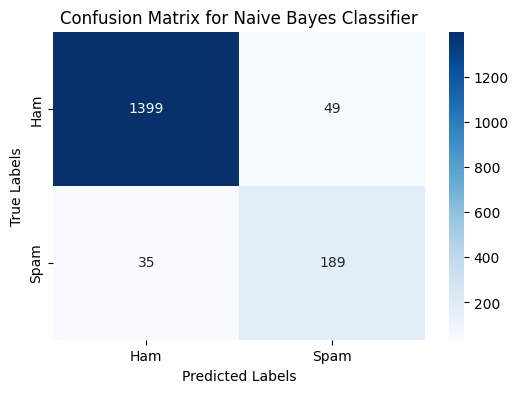

Accuracy without keyword features: 0.9498


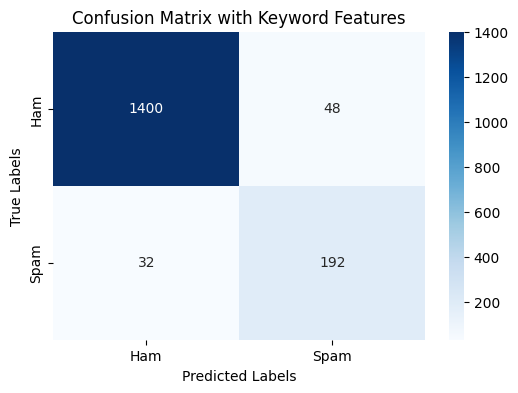

Accuracy with keyword features: 0.9522


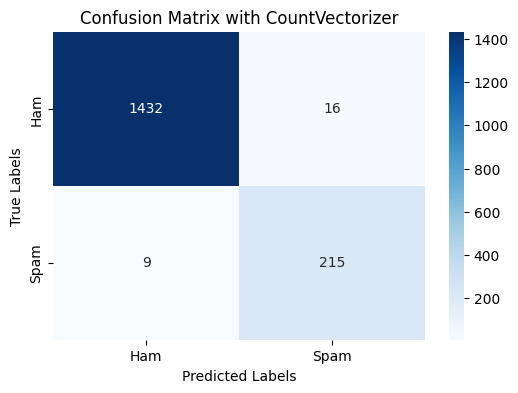

Accuracy with CountVectorizer: 0.9850


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

file_path = 'SMSSpamCollection.csv'
data = pd.read_csv(file_path, sep='\t', header=None, names=['label', 'message'])

missing_values = data.isnull().sum()

data['label'] = data['label'].map({'ham': 0, 'spam': 1})

data['message_length'] = data['message'].apply(len)
data['uppercase_count'] = data['message'].apply(lambda x: sum(1 for c in x if c.isupper()))
data['digit_count'] = data['message'].apply(lambda x: sum(1 for c in x if c.isdigit()))

X = data[['message_length', 'uppercase_count', 'digit_count']]
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
print(f"Accuracy without keyword features: {accuracy:.4f}")

data['contains_FREE'] = data['message'].str.contains('FREE', case=False).astype(int)
data['contains_WIN'] = data['message'].str.contains('WIN', case=False).astype(int)
data['contains_CALL_NOW'] = data['message'].str.contains('CALL NOW', case=False).astype(int)

X = data[['message_length', 'uppercase_count', 'digit_count', 'contains_FREE', 'contains_WIN', 'contains_CALL_NOW']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy_with_keywords = accuracy_score(y_test, y_pred)
conf_matrix_with_keywords = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_with_keywords, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix with Keyword Features')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
print(f"Accuracy with keyword features: {accuracy_with_keywords:.4f}")

vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(data['message'])

X_train_vec, X_test_vec, y_train_vec, y_test_vec = train_test_split(X_vectorized, y, test_size=0.3, random_state=42)

model.fit(X_train_vec, y_train_vec)
y_pred_vec = model.predict(X_test_vec)

accuracy_with_vectorizer = accuracy_score(y_test_vec, y_pred_vec)
conf_matrix_with_vectorizer = confusion_matrix(y_test_vec, y_pred_vec)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_with_vectorizer, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix with CountVectorizer')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
print(f"Accuracy with CountVectorizer: {accuracy_with_vectorizer:.4f}")

**Zadanie 3:**
Plik *loan_approval_dataset.csv* zawiera informacje o kredytobiorcach, stwórz model K-NN którego zadaniem będzie akceptacji kredytów na podstawie danych.
1. Odczytaj dane z pliku, sprawdź czy występują puste rekordy, jeżeli tak to wstaw wartość medianową dla danej kolumny. Zamień zmienne kategoryczne na numeryczne.
2. Zaimplementuj model K-NN z wykorzystaniem miary „euklidesowej” oraz $k = 5$. Sprawdź jakość modelu przez obliczenie: dokładności i macierzy pomyłek, macierz przedstaw na wykresie.
3. Zmodyfikuj model przez zastosowanie innych miar odległości np. `minkowski`, `manhattan`, `euclidean` oraz $k = [7,9,11]$. Sprawdź jakość modelu.
4. Zakładając miarę `euclidean` oraz $k = 5$ sprawdź jaki wpływ na jakość modelu będzie mieć usunięcie kolumn `no_of_dependents`, `education`, `self_employed`. Sprawdź jakość modelu przez obliczenie: dokładności i macierzy pomyłek, macierz przedstaw na wykresie.

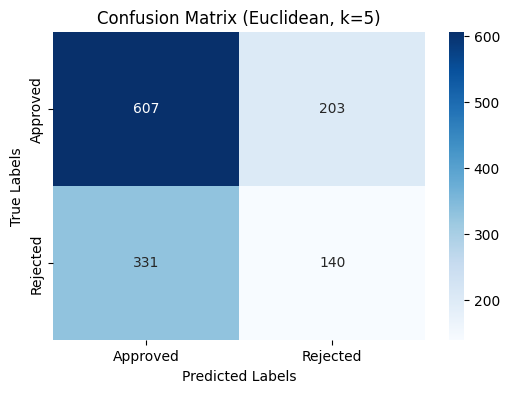

Accuracy (Euclidean, k=5): 0.5831
      Metric   k  Accuracy
0  euclidean   7  0.580796
1  euclidean   9  0.583138
2  euclidean  11  0.587041
3  manhattan   7  0.570648
4  manhattan   9  0.583919
5  manhattan  11  0.594067
6  minkowski   7  0.580796
7  minkowski   9  0.583138
8  minkowski  11  0.587041


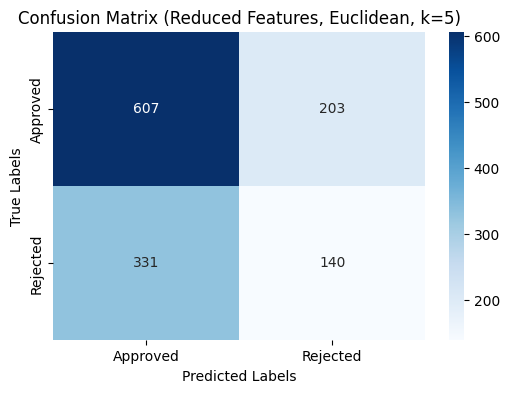

Accuracy (Reduced Features, Euclidean, k=5): 0.5831


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


file_path = 'loan_approval_dataset.csv'
loan_data = pd.read_csv(file_path)

loan_data = loan_data.fillna(loan_data.median(numeric_only=True))

loan_data['loan_status'] = loan_data['loan_status'].map({'Approved': 0, 'Rejected': 1})
loan_data = pd.get_dummies(loan_data, drop_first=True)

X = loan_data.drop('loan_status', axis=1)
y = loan_data['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Approved', 'Rejected'], yticklabels=['Approved', 'Rejected'])
plt.title('Confusion Matrix (Euclidean, k=5)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
print(f"Accuracy (Euclidean, k=5): {accuracy:.4f}")

metrics = ['euclidean', 'manhattan', 'minkowski']
k_values = [7, 9, 11]
results = []

for metric in metrics:
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results.append({'Metric': metric, 'k': k, 'Accuracy': accuracy})

results_df = pd.DataFrame(results)
print(results_df)

X_reduced = X.drop(['no_of_dependents', 'education_Not Graduate', 'self_employed_Yes'], axis=1)

X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

knn_reduced = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_reduced.fit(X_train_reduced, y_train_reduced)
y_pred_reduced = knn_reduced.predict(X_test_reduced)

accuracy_reduced = accuracy_score(y_test_reduced, y_pred_reduced)
conf_matrix_reduced = confusion_matrix(y_test_reduced, y_pred_reduced)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_reduced, annot=True, fmt='d', cmap='Blues', xticklabels=['Approved', 'Rejected'], yticklabels=['Approved', 'Rejected'])
plt.title('Confusion Matrix (Reduced Features, Euclidean, k=5)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
print(f"Accuracy (Reduced Features, Euclidean, k=5): {accuracy_reduced:.4f}")

**Zadanie 4**
Zapoznaj się z zawartością pliku *student_performance.csv* zawierający dane o wynikach studentów.
1. Utwórz na jego podstawie ramkę danych. Zbadaj strukturę danych, aby zrozumieć, jakie zmienne są dostępne i jakie operacje mogą być potrzebne do ich przekształcenia.
2. Zakoduj zmienne kategoryczne:
   Zmienna `Extracurricular Activities` jest zmienną kategoryczną (z wartościami `Yes` i `No`). Zamień tę zmienną na wartości numeryczne:
    Przypisz `1` dla `Yes`.
    Przypisz `0` dla `No`.
4. Przekształć zmienną docelową:
   Wskaźnik wyników studentów znajduje się w kolumnie `Performance Index`. Twoim celem jest stworzenie binarnej zmiennej wynikowej `High Performance`, gdzie:
   Wartość `1` oznacza wynik równy lub wyższy od mediany wartości w kolumnie `Performance Index`.
   Wartość `0` oznacza wynik niższy od mediany.
   Usuń oryginalną kolumnę `Performance Index`, ponieważ nie jest już potrzebna.
5. Normalizacja danych numerycznych:
   Znormalizuj wszystkie pozostałe zmienne wejściowe, aby miały one średnią $0$ i odchylenie standardowe $1$. Możesz użyć narzędzia takiego jak `StandardScaler` w Pythonie lub dowolnej innej metody normalizacji.
6. Podział na zbiór treningowy i testowy:
   Podziel dane na zbiór treningowy ($70\%$) i testowy ($30\%$), przy użyciu losowego podziału, ale z zachowaniem proporcji klas (np. używając opcji `stratify`).

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

file_path = 'student_performance.csv'
student_data = pd.read_csv(file_path)

print("Struktura danych:")
print(student_data.info())
print("\nPierwsze wiersze danych:")
print(student_data.head())

student_data['Extracurricular Activities'] = student_data['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

median_performance = student_data['Performance Index'].median()
student_data['High Performance'] = (student_data['Performance Index'] >= median_performance).astype(int)

student_data = student_data.drop(columns=['Performance Index'])

numeric_features = student_data.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
student_data[numeric_features] = scaler.fit_transform(student_data[numeric_features])

X = student_data.drop(columns=['High Performance'])
y = student_data['High Performance']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("\nPodsumowanie przetworzonych danych:")
print(student_data.head())

print("\nRozmiary zbiorów po podziale:")
print(f"Zbiór treningowy: {X_train.shape}, Zbiór testowy: {X_test.shape}")
print("\nRozkład klas w zbiorze treningowym:")
print(y_train.value_counts())
print("\nRozkład klas w zbiorze testowym:")
print(y_test.value_counts())

Struktura danych:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB
None

Pierwsze wiersze danych:
   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51            

**Zadanie 5**
Dokonaj klasyfikacji wykorzystując poznane modele:
1. Klasyfikacja za pomocą drzewa decyzyjnego:
   Twoim zadaniem jest użycie modelu drzewa decyzyjnego do klasyfikacji studentów na podstawie przygotowanych danych.
   * Wczytaj dane podzielone na zbiory treningowy i testowy.
   * Stwórz model drzewa decyzyjnego za pomocą biblioteki sklearn (`DecisionTreeClassifier` z parametrem `max_depth=5`).
   * Wytrenuj model na zbiorze treningowym.
   * Oceń model na zbiorze testowym za pomocą metryk, takich jak dokładność, precyzja i `recall`.
   * Wyświetl wykres drzewa decyzyjnego używając `plot_tree` z modułu `sklearn.tree`.
2. Klasyfikacja za pomocą regresji logistycznej
   Twoim zadaniem jest zastosowanie regresji logistycznej do klasyfikacji studentów.
   * Zaimportuj LogisticRegression z `sklearn.linear_model`.
   * Stwórz model regresji logistycznej i dopasuj go do zbioru treningowego.
   * Oceń model na zbiorze testowym, obliczając:
     - Dokładność (accuracy).
     - Wartość AUC dla krzywej ROC.
     - Wyświetl wykres ROC.
3. Klasyfikacja za pomocą $k$-najbliższych sąsiadów (k-NN)
   Twoim zadaniem jest użycie algorytmu $k$-najbliższych sąsiadów do klasyfikacji.
   * Zaimportuj `KNeighborsClassifier` z sklearn.neighbors.
   * Zbuduj model $k$-NN z odpowiednią wartością $k$ (np. $k=3$).
   * Wytrenuj model na zbiorze treningowym.
   * Oceń model za pomocą dokładności, a następnie znajdź optymalne k, testując różne wartości.
   * Zbadaj, jak zmiana liczby sąsiadów wpływa na dokładność klasyfikacji.
4. Klasyfikacja za pomocą maszyny wektorów nośnych (SVM)
   * Twoim zadaniem jest wykorzystanie maszyny wektorów nośnych do klasyfikacji studentów.
   * Zaimportuj `SVC` z `sklearn.svm`.
   * Zbuduj model SVM z jądrem liniowym (`kernel='linear'`).
   * Wytrenuj model na zbiorze treningowym.
   * Oceń model na zbiorze testowym.
   * Spróbuj użyć innych jąder (np. `rbf`, `poly`) i porównaj wyniki.
5. Klasyfikacja za pomocą naiwnego klasyfikatora Bayesa
   Twoim zadaniem jest zastosowanie klasyfikatora Bayesa w analizie danych.
   * Zaimportuj `GaussianNB` z `sklearn.naive_bayes`.
   * Zbuduj model i wytrenuj go na zbiorze treningowym.
   * Oceń model na zbiorze testowym za pomocą dokładności.
   * Porównaj skuteczność z innymi modelami.delami. wyniki.fikacji.kres ROC.zeuczenia?

Drzewo decyzyjne:
Accuracy: 0.9690
Precision: 0.9718
Recall: 0.9674


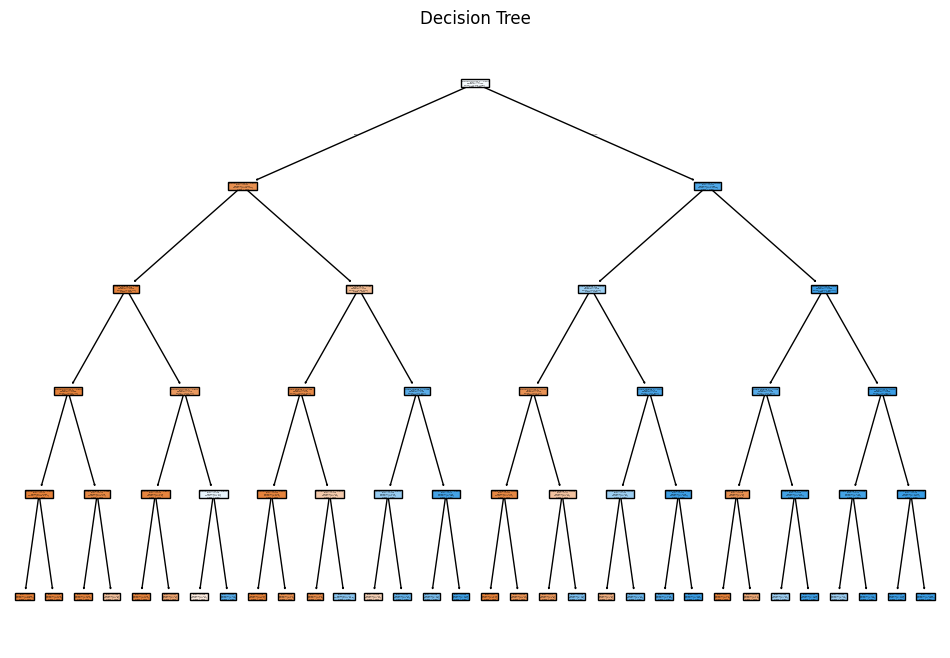


Regresja logistyczna:
Accuracy: 0.9733
AUC: 0.9979


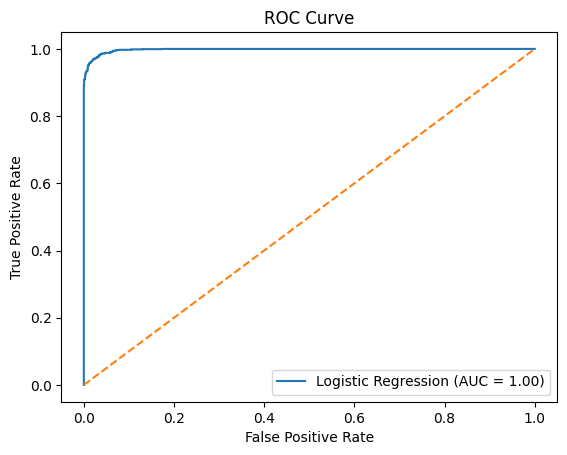


K-Nearest Neighbors:
Optimal k: 17, Accuracy: 0.9657


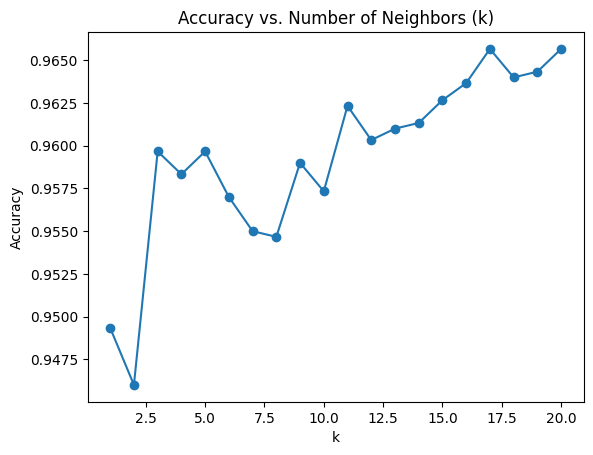


Support Vector Machines:
Kernel: linear, Accuracy: 0.9727, AUC: 0.9979
Kernel: rbf, Accuracy: 0.9720, AUC: 0.9974
Kernel: poly, Accuracy: 0.9707, AUC: 0.9971

Naiwny klasyfikator Bayesa:
Accuracy: 0.9213
Confusion Matrix:
[[1357  109]
 [ 127 1407]]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import numpy as np

file_path = 'student_performance.csv'
student_data = pd.read_csv(file_path)

student_data['Extracurricular Activities'] = student_data['Extracurricular Activities'].map({'Yes': 1, 'No': 0})
median_performance = student_data['Performance Index'].median()
student_data['High Performance'] = (student_data['Performance Index'] >= median_performance).astype(int)
student_data = student_data.drop(columns=['Performance Index'])
numeric_features = student_data.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
student_data[numeric_features] = scaler.fit_transform(student_data[numeric_features])
X = student_data.drop(columns=['High Performance'])
y = student_data['High Performance']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 1. Drzewo decyzyjne
print("Drzewo decyzyjne:")
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_tree):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_tree):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_tree):.4f}")
plt.figure(figsize=(12, 8))
plot_tree(tree_model, feature_names=X.columns, class_names=['Low', 'High'], filled=True)
plt.title("Decision Tree")
plt.show()

# 2. Regresja logistyczna
print("\nRegresja logistyczna:")
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
y_prob_logistic = logistic_model.predict_proba(X_test)[:, 1]
print(f"Accuracy: {accuracy_score(y_test, y_pred_logistic):.4f}")
print(f"AUC: {roc_auc_score(y_test, y_prob_logistic):.4f}")
fpr, tpr, _ = roc_curve(y_test, y_prob_logistic)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_score(y_test, y_prob_logistic)))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# 3. K-NN
print("\nK-Nearest Neighbors:")
k_values = range(1, 21)
accuracies = []
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred_knn))
optimal_k = k_values[np.argmax(accuracies)]
print(f"Optimal k: {optimal_k}, Accuracy: {max(accuracies):.4f}")
plt.figure()
plt.plot(k_values, accuracies, marker='o')
plt.title("Accuracy vs. Number of Neighbors (k)")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.show()

# 4. SVM
print("\nSupport Vector Machines:")
kernels = ['linear', 'rbf', 'poly']
for kernel in kernels:
    svm_model = SVC(kernel=kernel, probability=True, random_state=42)
    svm_model.fit(X_train, y_train)
    y_pred_svm = svm_model.predict(X_test)
    y_prob_svm = svm_model.predict_proba(X_test)[:, 1]
    print(f"Kernel: {kernel}, Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}, AUC: {roc_auc_score(y_test, y_prob_svm):.4f}")

# 5. Naiwny klasyfikator Bayesa
print("\nNaiwny klasyfikator Bayesa:")
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_nb)}")